In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
from tools import *

In [58]:
c0 = np.array([[1,9],
              [5,5],
[1,1]])

In [59]:
c1= np.array([[8,5],
              [13,1],
[13,9]])

In [60]:
Conct = np.vstack([c0, c1])

In [61]:
print(Conct)

[[ 1  9]
 [ 5  5]
 [ 1  1]
 [ 8  5]
 [13  1]
 [13  9]]


In [62]:
labels = np.concatenate((np.zeros(c0.shape[0]), np.ones(c1.shape[0])))

print(labels)

[0. 0. 0. 1. 1. 1.]


<ipython-input-63-c7aae3aa09ec>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Conct[:, 0], Conct[:, 1], cmap='coolwarm')


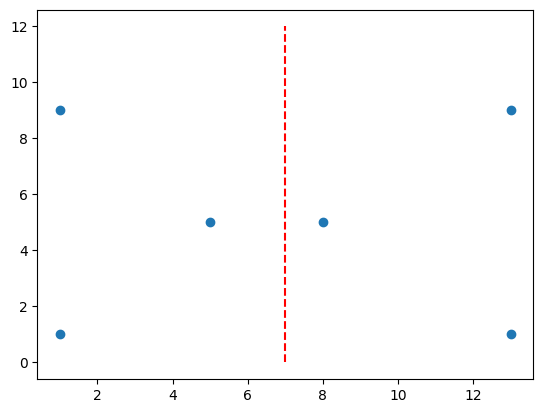

In [63]:
plt.scatter(Conct[:, 0], Conct[:, 1], cmap='coolwarm')
plt.plot([7, 7], [0, 12], color='r', linestyle='--')
plt.show()

<ipython-input-64-28a872bf0bfb>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Conct[:, 0], Conct[:, 1], cmap='coolwarm')


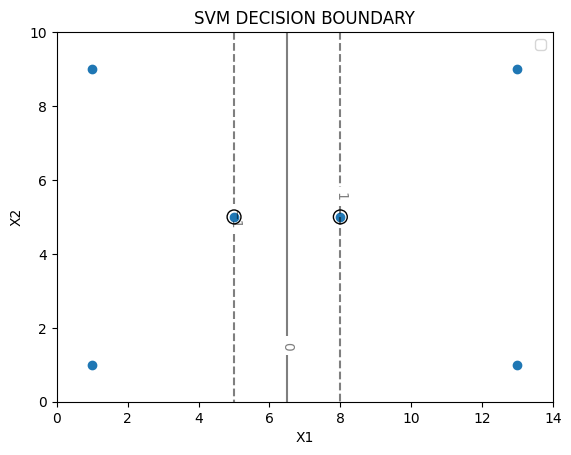

In [64]:

from sklearn import svm
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#grid of points to evaluate the decision function
x_min, x_max = Conct[:, 0].min() - 1, Conct[:, 0].max() + 1
y_min, y_max = Conct[:, 1].min() - 1, Conct[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
clf = svm.SVC(kernel='linear', C=100)
clf.fit(Conct, labels)
q = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
q = q.reshape(xx.shape)

#plot
plt.scatter(Conct[:, 0], Conct[:, 1], cmap='coolwarm')
contour = plt.contour(xx, yy, q, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.clabel(contour, inline=1, fontsize=10)
#suppport vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title('SVM DECISION BOUNDARY')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [65]:
X1, X2 =  make_meshgrid(Conct, labels, 0.01)

In [66]:
print(X1,X2)

[[0.000e+00 1.000e-02 2.000e-02 ... 1.397e+01 1.398e+01 1.399e+01]
 [0.000e+00 1.000e-02 2.000e-02 ... 1.397e+01 1.398e+01 1.399e+01]
 [0.000e+00 1.000e-02 2.000e-02 ... 1.397e+01 1.398e+01 1.399e+01]
 ...
 [0.000e+00 1.000e-02 2.000e-02 ... 1.397e+01 1.398e+01 1.399e+01]
 [0.000e+00 1.000e-02 2.000e-02 ... 1.397e+01 1.398e+01 1.399e+01]
 [0.000e+00 1.000e-02 2.000e-02 ... 1.397e+01 1.398e+01 1.399e+01]] [[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [9.97 9.97 9.97 ... 9.97 9.97 9.97]
 [9.98 9.98 9.98 ... 9.98 9.98 9.98]
 [9.99 9.99 9.99 ... 9.99 9.99 9.99]]


In [67]:

def plot_decision_boundary(X, y, X1, X2,classifier, plot_mean=True):
    X_set, y_set= X, y
    plt.figure(figsize=(10, 10))
    cmap=plt.cm.coolwarm
    plt.contourf(X1, X2, classifier, cmap=cmap, alpha=0.9)
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=cmap, marker='o')
    if plot_mean:
        mean_0 = np.mean(X_set[y_set == 0], axis=0)
        mean_1 = np.mean(X_set[y_set == 1], axis=0)
        plt.scatter(mean_0[0], mean_0[1], c='black', cmap=cmap, marker='x')
        plt.scatter(mean_1[0], mean_1[1], c='green', cmap=cmap, marker='x')

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.title('SVM DECISION BOUNDARY')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()


<ipython-input-67-90492c46c3e3>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mean_0[0], mean_0[1], c='black', cmap=cmap, marker='x')
<ipython-input-67-90492c46c3e3>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mean_1[0], mean_1[1], c='green', cmap=cmap, marker='x')


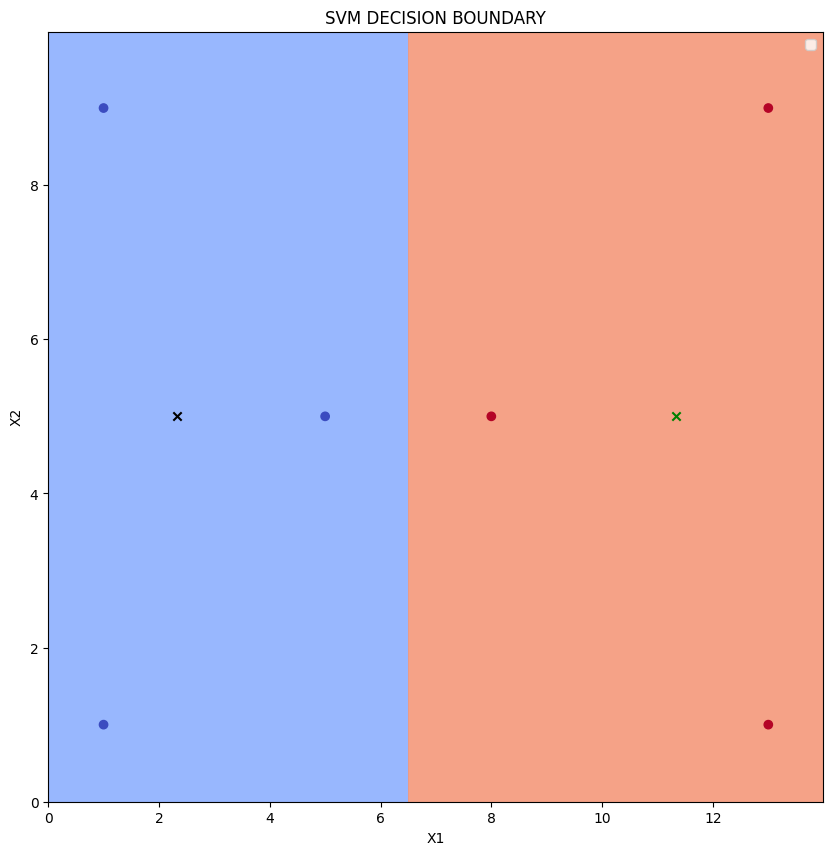

In [68]:
plot_decision_boundary(Conct, labels, X1, X2, X1>6.5, plot_mean=True)

Exercice 2

In [69]:
c0 = np.array([[2, 2], [3, 3], [4, 5], [5, 5], [4, 6], [3, 7], [4, 8], [5, 9], [6, 10]])

In [70]:
c1 =np.array([[6, 2], [7, 3], [8, 4], [9, 5], [8, 6], [7, 7], [7, 8], [7, 9], [8, 10]])

In [71]:
Conct = np.vstack([c0, c1])

In [72]:
print(Conct)

[[ 2  2]
 [ 3  3]
 [ 4  5]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 4  8]
 [ 5  9]
 [ 6 10]
 [ 6  2]
 [ 7  3]
 [ 8  4]
 [ 9  5]
 [ 8  6]
 [ 7  7]
 [ 7  8]
 [ 7  9]
 [ 8 10]]


In [73]:
labels = np.concatenate((np.zeros(c0.shape[0]), np.ones(c1.shape[0])))

print(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


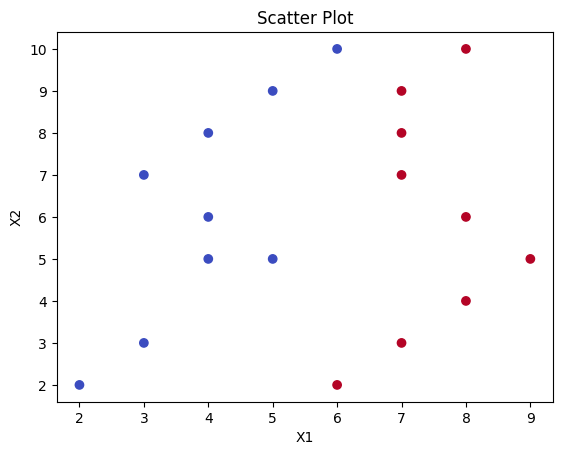

In [74]:
plt.scatter(Conct[:, 0], Conct[:, 1],c=labels, cmap='coolwarm')
plt.title('Scatter Plot')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [75]:
clf = SVC(kernel='linear', C=1e6)
clf.fit(Conct, labels)
support_vectors = clf.support_vectors_

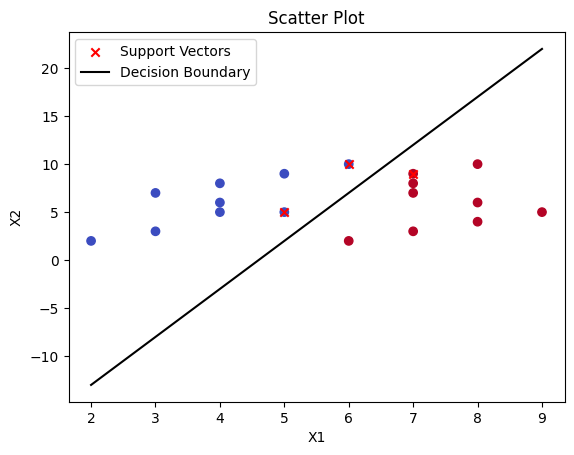

In [76]:
plt.scatter(Conct[:, 0], Conct[:, 1],c=labels, cmap='coolwarm')
plt.title('Scatter Plot')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')
#plot the line by searching the coefficients for decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(Conct[:,0].min(), Conct[:,0].max())
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-', label='Decision Boundary')

plt.legend()
plt.show()


In [77]:
X1 , X2 = make_meshgrid(Conct,labels,0.01)

In [78]:
from sklearn.svm import SVC

# Create the SVM classifier
svm_classifier = SVC(kernel='linear', C=100)

# Train the classifier using your data
svm_classifier.fit(Conct, labels)


SVC(C=100, kernel='linear')

In [79]:
# Example prediction
# Generate predictions for the grid of points
predicted_class = svm_classifier.predict(np.c_[X1.ravel(), X2.ravel()])

# Reshape the predictions to match the shape of X1
predicted_class = predicted_class.reshape(X1.shape)

# Print the predicted class labels
print("Predicted class:")
print(predicted_class)


Predicted class:
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


<ipython-input-67-90492c46c3e3>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mean_0[0], mean_0[1], c='black', cmap=cmap, marker='x')
<ipython-input-67-90492c46c3e3>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mean_1[0], mean_1[1], c='green', cmap=cmap, marker='x')


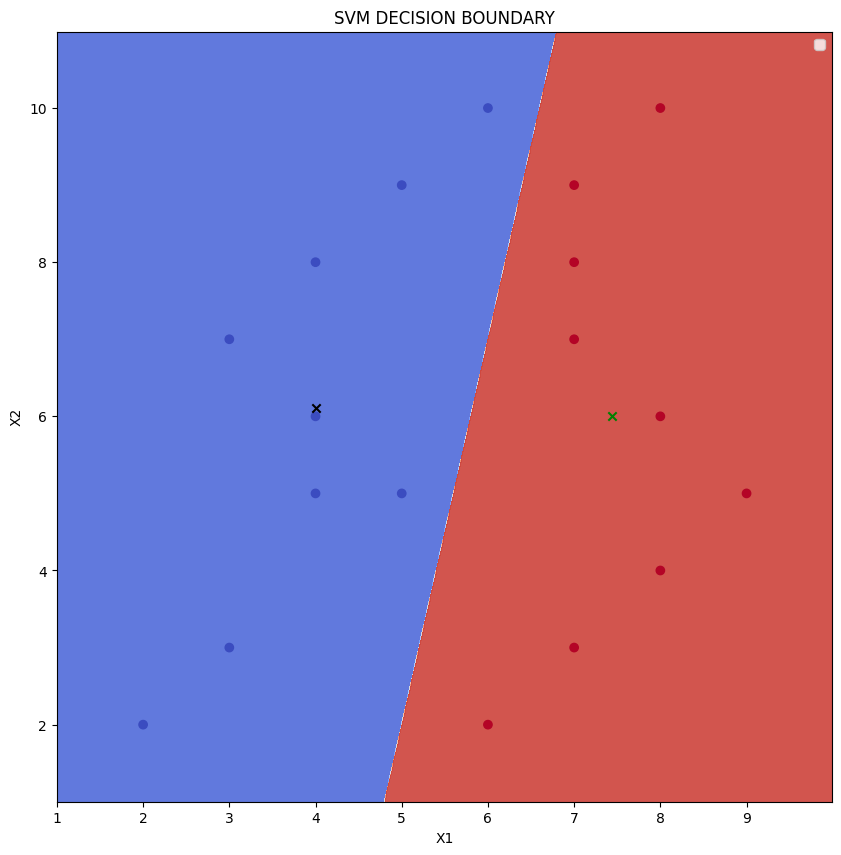

In [80]:
plot_decision_boundary(Conct, labels, X1, X2, predicted_class)

<ipython-input-67-90492c46c3e3>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mean_0[0], mean_0[1], c='black', cmap=cmap, marker='x')
<ipython-input-67-90492c46c3e3>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mean_1[0], mean_1[1], c='green', cmap=cmap, marker='x')


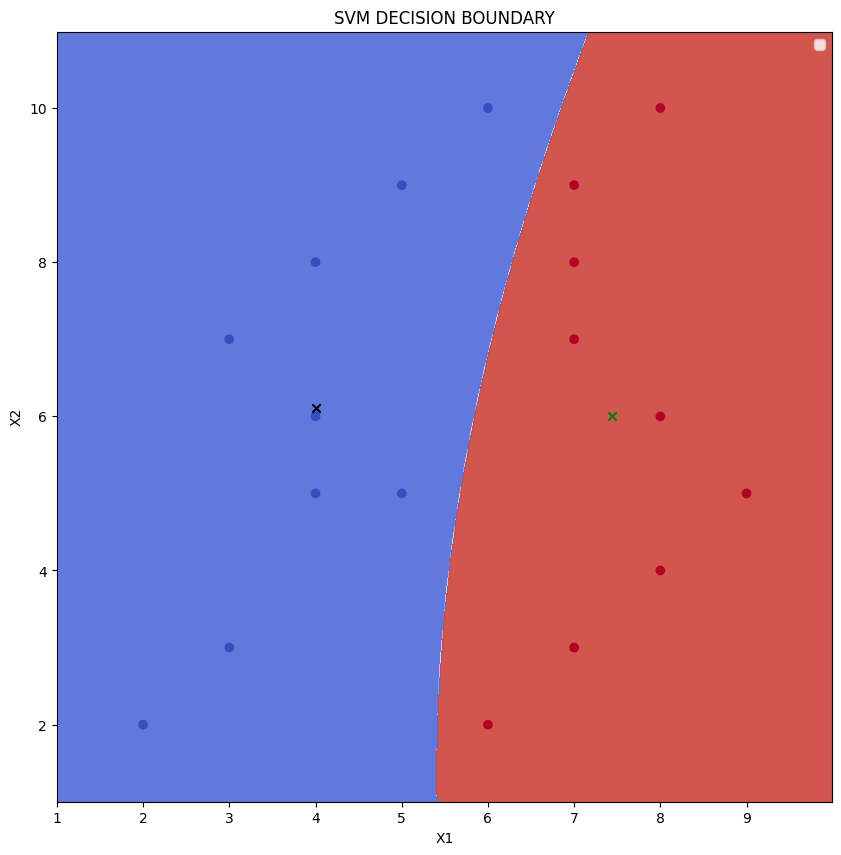

In [81]:
clfp = SVC(kernel='poly', C=10)
clfp.fit(Conct, labels)

Q = clfp.predict(np.c_[X1.ravel(), X2.ravel()])
Q = Q.reshape(X1.shape)
plot_decision_boundary(Conct, labels, X1, X2, Q)

<ipython-input-67-90492c46c3e3>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mean_0[0], mean_0[1], c='black', cmap=cmap, marker='x')
<ipython-input-67-90492c46c3e3>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mean_1[0], mean_1[1], c='green', cmap=cmap, marker='x')


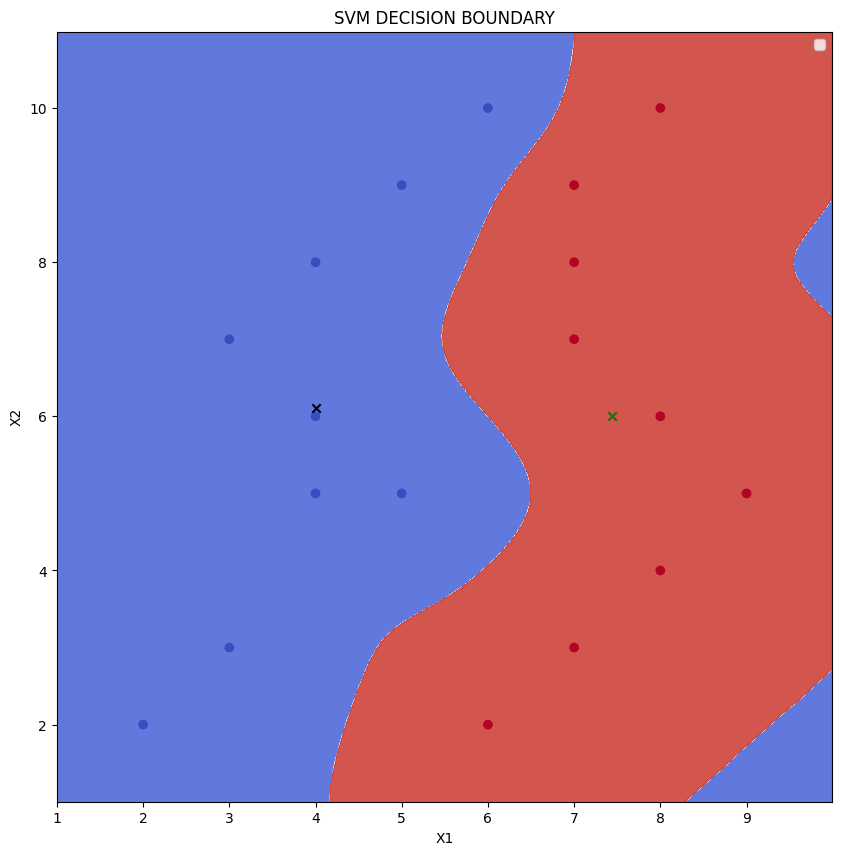

In [82]:
clfrbf = SVC(kernel='rbf', C=100, gamma=1)
clfrbf.fit(Conct, labels)

R = clfrbf.predict(np.c_[X1.ravel(), X2.ravel()])
R = R.reshape(X1.shape)
plot_decision_boundary(Conct, labels, X1, X2, R)